In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# random seed for reproducibility
torch.manual_seed(42)

In [ ]:
# loading the dataset
df = pd.read_csv('/content/fashion-mnist_test.csv',nrows=6000)

In [ ]:
df.shape

(468, 785)

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


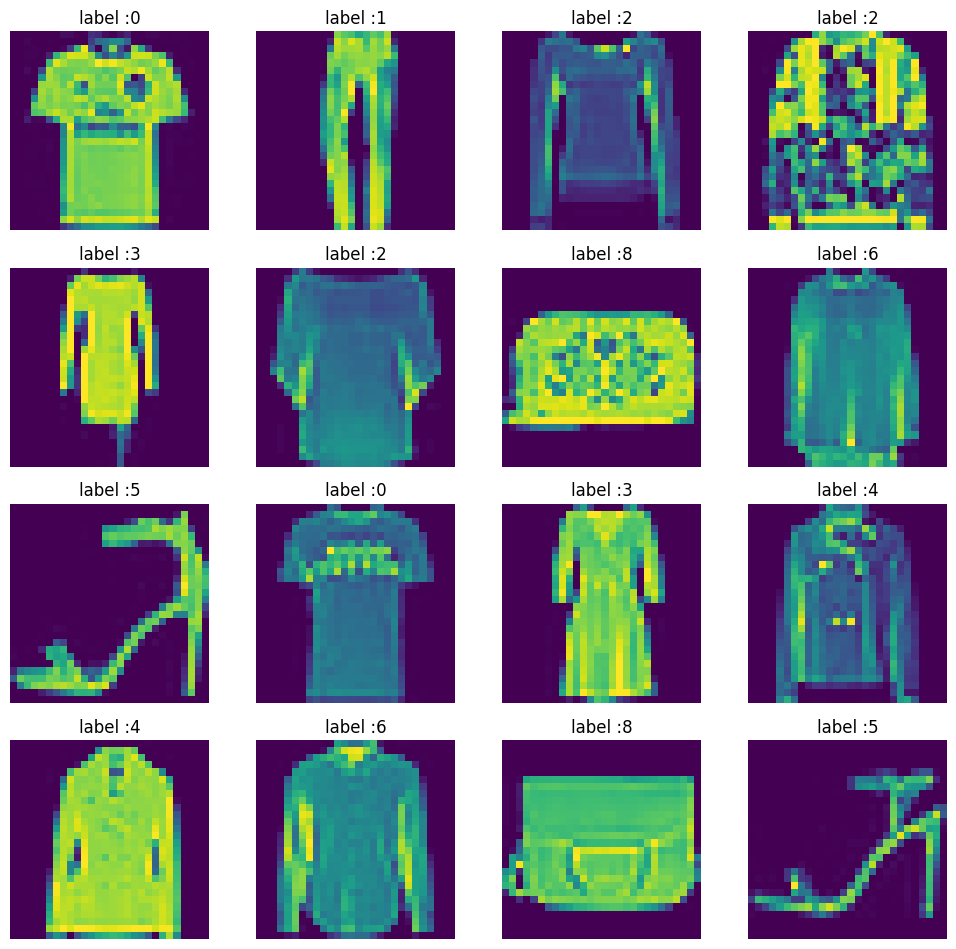

In [ ]:
# displaying 4x4 grid image
fig,axes = plt.subplots(4,4,figsize=(10,10))

# ploting the first 16 img from the datset
for i,ax in enumerate(axes.flat):

  img = df.iloc[i, 1:].values.reshape(28,28)    # reshape to 28x28
  ax.imshow(img)                              # displaying the grayscale img
  ax.axis('off')                              # removing axis for cleaner look
  ax.set_title(f"label :{df.iloc[i,0]}")      # show labels

plt.tight_layout(rect=[0,0,1,0.96])           # adjust layout to fit the title
plt.show()

In [ ]:
# separating the features and target
x = df.drop(columns=['label'],axis=1)
y = df['label']

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,14,53,99,17,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,161,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0,0,0,0,0,0,1,3,0,0,...,99.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
464,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,0,0,0,0,0,0,0,0,0,64,...,1.0,0.0,30.0,129.0,101.0,29.0,0.0,0.0,0.0,0.0
466,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,label
0,0
1,1
2,2
3,2
4,3
...,...
463,6
464,3
465,2
466,7


In [ ]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# scaling the features
x_train = x_train/255.0
x_test  = x_test/255.0

In [ ]:
# creating customDataset class
from torch.utils.data import Dataset,DataLoader
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index], self.labels[index]


In [ ]:
# create train,test dataset object
train_dataset = CustomDataset(x_train.values, y_train.values)
test_dataset = CustomDataset(x_test.values, y_test.values)

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

374
94


In [ ]:
# train test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=True)

In [ ]:
# creating NN class
import torch.nn as nn

class SimpleNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
# set learning rate and epochs
learning_Rate = 0.1
epochs = 100

In [ ]:
# instatiate the model
model = SimpleNN(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = learning_Rate)

In [ ]:
# training loop
for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features,batch_labels in train_loader:
    # forward pass
    output = model(batch_features)

    # calculate loss
    loss = criterion(output,batch_labels)

    # clear gradient
    optimizer.zero_grad()

    # backward pss
    loss.backward()

    # update grad
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

    # average loss
  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch : {epoch+1}, Loss : {avg_loss}")

Epoch : 1, Loss : nan
Epoch : 2, Loss : nan
Epoch : 3, Loss : nan
Epoch : 4, Loss : nan
Epoch : 5, Loss : nan
Epoch : 6, Loss : nan
Epoch : 7, Loss : nan
Epoch : 8, Loss : nan
Epoch : 9, Loss : nan
Epoch : 10, Loss : nan
Epoch : 11, Loss : nan
Epoch : 12, Loss : nan
Epoch : 13, Loss : nan
Epoch : 14, Loss : nan
Epoch : 15, Loss : nan
Epoch : 16, Loss : nan
Epoch : 17, Loss : nan
Epoch : 18, Loss : nan
Epoch : 19, Loss : nan
Epoch : 20, Loss : nan
Epoch : 21, Loss : nan
Epoch : 22, Loss : nan
Epoch : 23, Loss : nan
Epoch : 24, Loss : nan
Epoch : 25, Loss : nan
Epoch : 26, Loss : nan
Epoch : 27, Loss : nan
Epoch : 28, Loss : nan
Epoch : 29, Loss : nan
Epoch : 30, Loss : nan
Epoch : 31, Loss : nan
Epoch : 32, Loss : nan
Epoch : 33, Loss : nan
Epoch : 34, Loss : nan
Epoch : 35, Loss : nan
Epoch : 36, Loss : nan
Epoch : 37, Loss : nan
Epoch : 38, Loss : nan
Epoch : 39, Loss : nan
Epoch : 40, Loss : nan
Epoch : 41, Loss : nan
Epoch : 42, Loss : nan
Epoch : 43, Loss : nan
Epoch : 44, Loss : n

In [ ]:
# model evaluation
model.eval()


SimpleNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation code from scratch
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    # forward pss
    output = model(batch_features)
    _, predicted = torch.max(output,1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

accuracy = (correct/total)

print(accuracy)
print(f"Accuracy: {accuracy * 100:.2f}%")

0.09574468085106383
Accuracy: 9.57%
